<a href="https://colab.research.google.com/github/VNed/Some-stuff/blob/master/NEW_YORK_CITY_restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. 

This also means that the market is highly competitive. As it is highly developed city the cost of doing business is also one of the highest. Thus, any new business venture or expansion needs to be analyzed carefully. The insights derived from analysis will give good understanding of the business environment which help in strategically targeting the market. This will help in reduction of risk. And the Return on Investment will be reasonable.

A well established restaurant chain for Italian food is looking for an opportunity to expand its business in North America. As an employee it is my job to analyze big cities like New York, San Francisco, Toronto etc. and propose a suitable location for the restaurant. In order to accomplish the task I need to gather the following information:
1.	Gather information about New York City boroughs and neighborhoods.
2.	List the nearby venues like restaurants, coffee shops, shopping centers business centers.
3.	Determine most preferred food.
4.	Pinpoint the most suitable place to open a restaurant in Manhattan and Brooklyn.
 

If a business wants to stay competitive many other thigs must be takin into consideration like population, demographics, markets and access to ingredients, competition etc.

#### The developed can be used to recommend a suitable location for opening a restaurant in any city around the world. If a business wants to stay competitive many other thigs must be taken into consideration like population, demographics, markets and access to ingredients, competition etc. Once the analysis is done it can be presented to the management for the purpose of making the decision whether it is suitable to expand the business.

LINK TO VIEW THE PROJECT: https://nbviewer.jupyter.org/github/VNed/Some-stuff/blob/master/NEW_YORK_CITY_restaurant.ipynb


## Data <a name="data"></a>

#### New York City comprises 5 boroughs sitting where the Hudson River meets the Atlantic Ocean. At its core is Manhattan, a densely populated borough that’s among the world’s major commercial, financial and cultural centers. The data for the 5 boroughs and 306 neighborhoods is available at https://geo.nyu.edu/catalog/nyu_2451_34572.
#### A data for the local market is also needed in order to analyze the availability of needed food and ingredients.  In the below link Farmer market data is given:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

#### A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.
#### For further analysis we need to gather information about Now York population, demographics and cuisine. That data can be scraped from various websitelike wikipedia:
https://en.wikipedia.org/wiki/New_York_City 

https://en.wikipedia.org/wiki/Portal:New_York_City 

https://en.wikipedia.org/wiki/Cuisine_of_New_York_City 

https://en.wikipedia.org/wiki/Economy_of_New_York_City 

https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

### Downloading and creating dataframe with New York neighborhoods

In [102]:
!pip install geopy
!pip install lxml
!pip install beautifulsoup4

In [103]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans
from PIL import Image # converting images into arrays


!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

/bin/bash: conda: command not found
Libraries imported.


#### Downloading the data.

In [104]:
!wget -q -O 'NY.json' https://cocl.us/new_york_dataset
print('Data downloaded')

Data downloaded


#### Load and explore the data.

In [0]:
with open('NY.json') as json_data:
    NY_data = json.load(json_data)

In [0]:
#NY_data

#### The relevent data is in the features key.

In [107]:
neighborhoods_data = NY_data['features']
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [0]:
#NY_data['features']

In [0]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough':borough,
                                         'Neighborhood':neighborhood_name,
                                         'Latitude':neighborhood_lat,
                                         'Longitude':neighborhood_lon}, ignore_index=True)
    

In [110]:
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [111]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

#### Checking the validity of the results.

In [112]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Get the New York city coordinates using geopy. Geopy doesn't work properly all the time so it is better to input the coordinates!

In [0]:
#address = 'New York City, NY'
#geolocator = Nominatim(user_agent="newapp")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('Coordinates of NY city are {} and {}'.format(latitude, longitude))
latitude = 40.7127281
longitude = -74.0060152

#### Create a map of New York.

In [114]:
map_NewYork = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NewYork)
    
map_NewYork
    

#### Markets dafaframe. The dataset can be downloaded from the following link:
https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [115]:
#First we get the link to the file download which is https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
!wget -q -O 'market.csv' https://data.cityofnewyork.us/api/views/8vwk-6iz2/rows.csv?accessType=DOWNLOAD
print('File downloaded')

File downloaded


In [116]:
markets_NY = pd.read_csv('market.csv')
markets_NY.head()

Borough                       Market Name  \
0       Brooklyn        Urban Oasis Farmers Market   
1  Staten Island    Staten Island Mall Greenmarket   
2      Manhattan  Mount Sinai Hospital Greenmarket   
3          Bronx                    170 Farm Stand   
4      Manhattan        Grass Roots Farmers Market   

                                      Street Address   Latitude  Longitude  \
0                                   681 Clarkson Ave  40.656255 -73.936608   
1                                Marsh Ave & Ring Rd  40.583804 -74.161245   
2                  E 99th St bet Madison & Park Aves  40.789169 -73.952743   
3                          E 170th St & Townsend Ave  40.839882 -73.916783   
4  W 145th St bet Edgecombe & Bradhurst Aves, at ...  40.823647 -73.943844   

     Days of Operation Hours of Operations           Season Dates Accepts EBT  \
0            Wednesday       2 - 5:30 p.m.  06/26/2019-11/06/2019          No   
1             Saturday     8 a.m. - 3 p.m.             Year-Round         Yes   
2            Wednesday     8 a.m. - 5 p.m.      06/12/19-11/27/19         Yes   
3            Wednesday    2:30 - 6:30 p.m.  07/10/2019-11/27/2019         Yes   
4  Tuesday &\nSaturday     9 a.m. - 4 p.m.  07/11/2019-11/21/2019         Yes   

  Open Year-Round Stellar Cooking Demonstrations Food Activities for Kids  \
0              No                             No                       No   
1             Yes                             No                       No   
2              No                             No                       No   
3              No                             No                      Yes   
4              No                             No                       No   

            Location Point  
0  (40.656255, -73.936608)  
1  (40.583804, -74.161245)  
2  (40.789169, -73.952743)  
3  (40.839882, -73.916783)  
4  (40.823647, -73.943844)

In [0]:
#markets_NY['Service Type'].value_counts()

In [0]:
#filter the dataframe to get only the farmer markets
#markets_NY_filtered = markets_NY[markets_NY['Service Type'] == 'Farmers Markets'].copy()
#markets_NY_filtered['Borough'] = markets_NY_filtered['Borough'].map(lambda x: x.strip())
#print(markets_NY_filtered.shape)
#markets_NY_filtered.head()

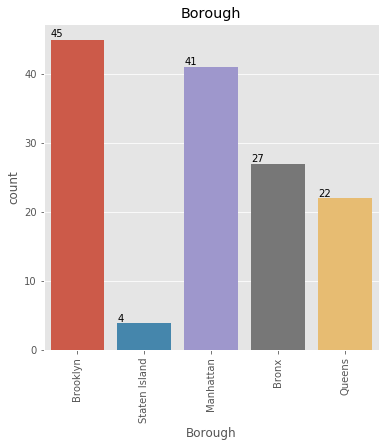

In [119]:
#Plot the number of markets for every Borough
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.countplot(x='Borough', data = markets_NY)
ax.set_title('Borough')
for t in ax.patches:
    if(np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split('T')[0] for t in ax.get_xticklabels()])
        
plt.xticks(rotation=90)
plt.show()

#### Create a map using folium with the markets superimposed on top.

In [120]:
markets_NY_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, FacilityName, borough in zip(markets_NY['Latitude'],
                                           markets_NY['Longitude'], markets_NY['Market Name'], markets_NY['Borough']):
    label = '{}, {}'.format(FacilityName, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(markets_NY_map)

markets_NY_map

### Brooklyn and Manhattan have the most markets. Opening a restaurant in these two boroughs will ensure access to more options and simplify the logistics.

### Demographics 

#### The data is available no wikipedia (https://en.wikipedia.org/wiki/Demographics_of_New_York_City). I am using scraping to get the data and convert it into a dataframe. The python packet is called BeautifulSoup4.

In [0]:
# Scraping the data off the wikipage.
from bs4 import BeautifulSoup
import requests
import csv
import numpy as np
import pandas as pd
import lxml

source = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(source, "lxml")
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = ['Borough', 'County', 'Population', 'GDP($)', 'GDP(per capita)', 'square miles', 'square km', 'persons/sq. miles', 'person/sq. km.']

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)



In [122]:
# as seen from below the information stats from row 3
print(rows)
new_rows = rows[3:]

df_pop = pd.DataFrame(new_rows, columns = headers)
df_pop.head(10)

[[], [], [], ['The Bronx\n', '\n  Bronx\n', '1,471,160\n', '28.787\n', '19,570\n', '42.10\n', '109.04\n', '34,653\n', '13,231\n'], ['Brooklyn\n', '\n  Kings\n', '2,648,771\n', '63.303\n', '23,900\n', '70.82\n', '183.42\n', '37,137\n', '14,649\n'], ['Manhattan\n', '\n  New York\n', '1,664,727\n', '629.682\n', '378,250\n', '22.83\n', '59.13\n', '72,033\n', '27,826\n'], ['Queens\n', '\n   Queens\n', '2,358,582\n', '73.842\n', '31,310\n', '108.53\n', '281.09\n', '21,460\n', '8,354\n'], ['Staten Island\n', '\n   Richmond\n', '479,458\n', '11.249\n', '23,460\n', '58.37\n', '151.18\n', '8,112\n', '3,132\n'], ['City of New York', '8,622,698', '806.863', '93,574', '302.64', '783.83', '28,188', '10,947\n'], ['State of New York', '19,849,399', '1,547.116', '78,354', '47,214', '122,284', '416.4', '159\n'], ['Sources:[14] and see individual borough articles\n']]


Borough           County  \
0                                        The Bronx\n      \n  Bronx\n   
1                                         Brooklyn\n      \n  Kings\n   
2                                        Manhattan\n   \n  New York\n   
3                                           Queens\n    \n   Queens\n   
4                                    Staten Island\n  \n   Richmond\n   
5                                   City of New York        8,622,698   
6                                  State of New York       19,849,399   
7  Sources:[14] and see individual borough articl...             None   

    Population     GDP($) GDP(per capita) square miles square km  \
0  1,471,160\n   28.787\n        19,570\n      42.10\n  109.04\n   
1  2,648,771\n   63.303\n        23,900\n      70.82\n  183.42\n   
2  1,664,727\n  629.682\n       378,250\n      22.83\n   59.13\n   
3  2,358,582\n   73.842\n        31,310\n     108.53\n  281.09\n   
4    479,458\n   11.249\n        23,460\n      58.37\n  151.18\n   
5      806.863     93,574          302.64       783.83    28,188   
6    1,547.116     78,354          47,214      122,284     416.4   
7         None       None            None         None      None   

  persons/sq. miles person/sq. km.  
0          34,653\n       13,231\n  
1          37,137\n       14,649\n  
2          72,033\n       27,826\n  
3          21,460\n        8,354\n  
4           8,112\n        3,132\n  
5          10,947\n           None  
6             159\n           None  
7              None           None

In [123]:
#drop the last row
df_pop.drop(df_pop.index[7], inplace=True)
df_pop.head(10)

Borough           County   Population     GDP($) GDP(per capita)  \
0        The Bronx\n      \n  Bronx\n  1,471,160\n   28.787\n        19,570\n   
1         Brooklyn\n      \n  Kings\n  2,648,771\n   63.303\n        23,900\n   
2        Manhattan\n   \n  New York\n  1,664,727\n  629.682\n       378,250\n   
3           Queens\n    \n   Queens\n  2,358,582\n   73.842\n        31,310\n   
4    Staten Island\n  \n   Richmond\n    479,458\n   11.249\n        23,460\n   
5   City of New York        8,622,698      806.863     93,574          302.64   
6  State of New York       19,849,399    1,547.116     78,354          47,214   

  square miles square km persons/sq. miles person/sq. km.  
0      42.10\n  109.04\n          34,653\n       13,231\n  
1      70.82\n  183.42\n          37,137\n       14,649\n  
2      22.83\n   59.13\n          72,033\n       27,826\n  
3     108.53\n  281.09\n          21,460\n        8,354\n  
4      58.37\n  151.18\n           8,112\n        3,132\n  
5       783.83    28,188          10,947\n           None  
6      122,284     416.4             159\n           None

In [124]:
#shift the last two rows by one column
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']] =\
df_pop.loc[5:,['Borough', 'County','Population','GDP($)','GDP(per capita)','square miles','square km','persons/sq. miles','person/sq. km.']].shift(1,axis=1)
df_pop.head(10)

Borough             County   Population     GDP($) GDP(per capita)  \
0      The Bronx\n        \n  Bronx\n  1,471,160\n   28.787\n        19,570\n   
1       Brooklyn\n        \n  Kings\n  2,648,771\n   63.303\n        23,900\n   
2      Manhattan\n     \n  New York\n  1,664,727\n  629.682\n       378,250\n   
3         Queens\n      \n   Queens\n  2,358,582\n   73.842\n        31,310\n   
4  Staten Island\n    \n   Richmond\n    479,458\n   11.249\n        23,460\n   
5              NaN   City of New York    8,622,698    806.863          93,574   
6              NaN  State of New York   19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0      42.10\n  109.04\n          34,653\n       13,231\n  
1      70.82\n  183.42\n          37,137\n       14,649\n  
2      22.83\n   59.13\n          72,033\n       27,826\n  
3     108.53\n  281.09\n          21,460\n        8,354\n  
4      58.37\n  151.18\n           8,112\n        3,132\n  
5       302.64    783.83            28,188       10,947\n  
6       47,214   122,284             416.4          159\n

In [125]:
# Delete the newline sign '\n'.
df_pop['Borough'] = df_pop['Borough'].replace(to_replace='\n', value='', regex=True)
df_pop['County'] = df_pop['County'].replace(to_replace='\n', value='', regex=True)
df_pop['Population'] = df_pop['Population'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP($)'] = df_pop['GDP($)'].replace(to_replace='\n', value='', regex=True)
df_pop['GDP(per capita)'] = df_pop['GDP(per capita)'].replace(to_replace='\n', value='', regex=True)
df_pop['square miles'] = df_pop['square miles'].replace(to_replace='\n', value='', regex=True)
df_pop['persons/sq. miles'] = df_pop['persons/sq. miles'].replace(to_replace='\n', value='', regex=True)
df_pop['square km'] = df_pop['square km'].replace(to_replace='\n', value='', regex=True)
df_pop['person/sq. km.'] = df_pop['person/sq. km.'].replace(to_replace='\n', value='', regex=True)

df_pop.head(8)

Borough             County  Population     GDP($) GDP(per capita)  \
0      The Bronx              Bronx   1,471,160     28.787          19,570   
1       Brooklyn              Kings   2,648,771     63.303          23,900   
2      Manhattan           New York   1,664,727    629.682         378,250   
3         Queens             Queens   2,358,582     73.842          31,310   
4  Staten Island           Richmond     479,458     11.249          23,460   
5            NaN   City of New York   8,622,698    806.863          93,574   
6            NaN  State of New York  19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0        42.10    109.04            34,653         13,231  
1        70.82    183.42            37,137         14,649  
2        22.83     59.13            72,033         27,826  
3       108.53    281.09            21,460          8,354  
4        58.37    151.18             8,112          3,132  
5       302.64    783.83            28,188         10,947  
6       47,214   122,284             416.4            159

In [126]:
#Delete 'Nan' Value
df_pop = df_pop.fillna('')
df_pop.head(10)

Borough             County  Population     GDP($) GDP(per capita)  \
0      The Bronx              Bronx   1,471,160     28.787          19,570   
1       Brooklyn              Kings   2,648,771     63.303          23,900   
2      Manhattan           New York   1,664,727    629.682         378,250   
3         Queens             Queens   2,358,582     73.842          31,310   
4  Staten Island           Richmond     479,458     11.249          23,460   
5                  City of New York   8,622,698    806.863          93,574   
6                 State of New York  19,849,399  1,547.116          78,354   

  square miles square km persons/sq. miles person/sq. km.  
0        42.10    109.04            34,653         13,231  
1        70.82    183.42            37,137         14,649  
2        22.83     59.13            72,033         27,826  
3       108.53    281.09            21,460          8,354  
4        58.37    151.18             8,112          3,132  
5       302.64    783.83            28,188         10,947  
6       47,214   122,284             416.4            159

#### From the wikipage https://en.wikipedia.org/wiki/New_York_City we can also get the racial composition of New York City

In [0]:
#Scraping the table
source2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(source2, 'lxml')
table2 = soup2.find('table', {'class': 'wikitable collapsible collapsed'})

headers2 = ['Racial composition', '2010', '1990', '1970', '1940']
table_rows = table2.find_all('tr')
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)
# There are many tables with  calss 'wikitable collapsible collapsed'. The code above manages to scrape a table about the weather

In [0]:
#We need scraping all tables of that class since the code above gets me the table with the weather data!

source2 = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup2 = BeautifulSoup(source2, 'lxml')
table2 = soup2.find_all('table', {'class': 'wikitable collapsible collapsed'})

### We are looking for the data in table[2] as seen from below

In [129]:
#The data we are looking for is in the second list. Every list is a table. 
table2[2]

<table class="wikitable collapsible collapsed" style="font-size: 90%;">
<tbody><tr>
<th>Racial composition</th>
<th>2010<sup class="reference" id="cite_ref-QuickFacts2010_272-1"><a href="#cite_note-QuickFacts2010-272">[270]</a></sup></th>
<th>1990<sup class="reference" id="cite_ref-pop_274-0"><a href="#cite_note-pop-274">[272]</a></sup></th>
<th>1970<sup class="reference" id="cite_ref-pop_274-1"><a href="#cite_note-pop-274">[272]</a></sup></th>
<th>1940<sup class="reference" id="cite_ref-pop_274-2"><a href="#cite_note-pop-274">[272]</a></sup>
</th></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/White_American" title="White American">White</a></td>
<td>44.0%</td>
<td>52.3%</td>
<td>76.6%</td>
<td>93.6%
</td></tr>
<tr>
<td>—<a href="/wiki/Non-Hispanic_whites" title="Non-Hispanic whites">Non-Hispanic</a></td>
<td>33.3%</td>
<td>43.2%</td>
<td>62.9%<sup class="reference" id="cite_ref-fifteen_275-0"><a href="#cite_note-fifteen-275">[273]</a></sup></td>
<td>92.0%
</td></tr>
<tr>
<td><a cla

In [0]:
# Scraping the table for the racial data 
headers2 = ['Racial composition', '2010', '1990', '1970', '1940']
table_rows = table2[2].find_all('tr')
rows = []
for row in table_rows:
    td = row.find_all('td')
    row = [row.text for row in td]
    rows.append(row)

In [131]:
print(rows)

[[], ['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[273]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[273]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '−\n']]


In [132]:
# As seen from the print ther data is in rows[1:] which will exclude first row
rows = rows[1:]
print(rows)

[['White', '44.0%', '52.3%', '76.6%', '93.6%\n'], ['—Non-Hispanic', '33.3%', '43.2%', '62.9%[273]', '92.0%\n'], ['Black or African American', '25.5%', '28.7%', '21.1%', '6.1%\n'], ['Hispanic or Latino (of any race)', '28.6%', '24.4%', '16.2%[273]', '1.6%\n'], ['Asian', '12.7%', '7.0%', '1.2%', '−\n']]


In [133]:
# Creating dataframe with the racial data
df_rac = pd.DataFrame(rows, columns = headers2)
df_rac.head(10)

Racial composition   2010   1990        1970     1940
0                             White  44.0%  52.3%       76.6%  93.6%\n
1                     —Non-Hispanic  33.3%  43.2%  62.9%[273]  92.0%\n
2         Black or African American  25.5%  28.7%       21.1%   6.1%\n
3  Hispanic or Latino (of any race)  28.6%  24.4%  16.2%[273]   1.6%\n
4                             Asian  12.7%   7.0%        1.2%      −\n

In [134]:
#clean the '\n' symbol and [248]
df_rac['1940'] = df_rac['1940'].replace(to_replace='\n', value = '', regex = True)
df_rac['1970'] = df_rac['1970'].str.rstrip('[248]')
df_rac.head()

Racial composition   2010   1990       1970   1940
0                             White  44.0%  52.3%      76.6%  93.6%
1                     —Non-Hispanic  33.3%  43.2%  62.9%[273  92.0%
2         Black or African American  25.5%  28.7%      21.1%   6.1%
3  Hispanic or Latino (of any race)  28.6%  24.4%  16.2%[273   1.6%
4                             Asian  12.7%   7.0%       1.2%      −

### Now lets look at New York Cuisite data

In [135]:
%matplotlib inline
!conda install -c conda-forge wordcloud==1.4.1 --yes
import matplotlib as mpl
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
mpl.style.use('ggplot') # optional: for ggplot-like style

/bin/bash: conda: command not found


#### We can scrape the data from the following wikipage:https://en.wikipedia.org/wiki/Cuisine_of_New_York_City

In [0]:
#Scraping the data
source = requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City')
soup = BeautifulSoup(source.content,'html.parser')
l = []
for rest in soup.find_all('div', {'class':'div-col columns column-width'}):
    for li in rest.find_all('li'):
        cui = li.text.split('–')
        l.append(cui)
l = l[:52]

In [0]:
#Creating a list of the Boroughs as given in the wikipage
bor = [ 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Bronx', 'Queen', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens',
 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Queens', 'Brooklyn',  'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn', 'Brooklyn',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan',
 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']

In [138]:
#Creating the dataframe
df1 = pd.DataFrame(l, columns = ['Neighborhood', 'Cuisine'])
df1.head()

Neighborhood                                            Cuisine
0  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...
1       Belmont    Italian, Albanian (also known as "Arthur Aven...
2   City Island                                    Italian, Seafood
3   Morris Park                                   Italian, Albanian
4       Norwood            Filipino (formerly Irish, less so today)

In [139]:
#Adding borough column
df1['Borough'] = bor
df1.head()

Neighborhood                                            Cuisine Borough
0  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...   Bronx
1       Belmont    Italian, Albanian (also known as "Arthur Aven...   Bronx
2   City Island                                    Italian, Seafood   Bronx
3   Morris Park                                   Italian, Albanian   Bronx
4       Norwood            Filipino (formerly Irish, less so today)   Bronx

In [140]:
#rearranging the columns
df_cuisine = df1[['Borough', 'Neighborhood', 'Cuisine']]
df_cuisine.head()

Borough   Neighborhood                                            Cuisine
0   Bronx  Bedford Park    Mexican, Puerto Rican, Dominican, Korean (on ...
1   Bronx       Belmont    Italian, Albanian (also known as "Arthur Aven...
2   Bronx   City Island                                    Italian, Seafood
3   Bronx   Morris Park                                   Italian, Albanian
4   Bronx       Norwood            Filipino (formerly Irish, less so today)

#### Analyze the gathered data using word cloud

In [141]:
cui_wc = df_cuisine[['Cuisine']]
cui_wc

Cuisine
0    Mexican, Puerto Rican, Dominican, Korean (on ...
1    Italian, Albanian (also known as "Arthur Aven...
2                                    Italian, Seafood
3                                   Italian, Albanian
4            Filipino (formerly Irish, less so today)
5                                              Jewish
6                             Puerto Rican, Dominican
7                               Jamaican, West Indian
8                                               Irish
9    Greek, Italian, Eastern European, Brazilian, ...
10                               Indian and Pakistani
11                                 Chinese and Korean
12                          Jewish, Russian and Uzbek
13                                            Italian
14                                  German and Polish
15   Indian, Pakistani, Bangladeshi, Colombian, Ec...
16   Bangladeshi, Caribbean; African-American; Afr...
17                         Arab, Chinese, and Italian
18   Indian, Guyanese, West Indian, Pakistani, Ban...
19                                               None
20                Irish, Dominican, Mexican, Guyanese
21        Filipino, Irish, Mexican, Tibetan, Romanian
22   Irish, Italian, Greek, Turkish, Lebanese, Pal...
23   African-American, Jamaican, Trinidadian, Puer...
24   Italian, Chinese, Turkish, Russian, Mexican, ...
25                  Jewish, Italian, Mexican, Chinese
26   Russian, Georgian, Turkish, Pakistani and Ukr...
27   Puerto Rican, Mexican, Dominican, and Ecuadorian
28            Jamaican, West Indian, African-American
29                                            Italian
30                  Jamaican, West Indian, and Jewish
31      African-American, Dominican, and Puerto Rican
32                      Jamaican, Haitian, and Creole
33                               Polish and Ukrainian
34     Bengali, Pakistani, Mexican, Uzbek, and Polish
35            Jewish, Italian, Russian, and Pakistani
36   Italian, Irish, French, and Puerto Rican (for...
37        Puerto Rican, African-American, and Italian
38             Seafood, Chinese, Russian, and Italian
39   Puerto Rican, Chinese, Arab, Mexican and Italian
40        Italian, Jewish, Dominican and Puerto Rican
41                             Chinese and Vietnamese
42   Puerto Rican, Mexican, Dominican, Chinese-Cub...
43             Japanese, Korean, Indian and Ukrainian
44                         Italian and Middle Eastern
45   Italian, African-American, Latin American, We...
46                                             Korean
47                                         Australian
48                                            Italian
49   Puerto Rican, Jewish, Italian, and Latin Amer...
50                  Indian, Pakistani and Bangladeshi
51                                               None

In [0]:
cui_wc.to_csv('cui_wc.txt', sep=',', index = False)
cui_wc1 = open('cui_wc.txt', 'r').read()
stopwords = set(STOPWORDS)

In [143]:
#instantiate cloud object
ny_cuisine = WordCloud(
    background_color = 'white',
    max_words=2000,
    stopwords = stopwords)
ny_cuisine.generate(cui_wc1)

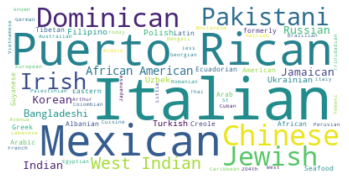

<Figure size 2160x3240 with 0 Axes>

In [144]:
#visualizing the cloud
plt.imshow(ny_cuisine, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

### The preffered food is Italian, which is a good thing in our case.

## Now lets use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan, since they have the most markets to supply our restaurant.

In [145]:
#At the beggining we created a dataframe containing borough, neighborhoods and coodrinates.
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [146]:
neighborhoods['Borough'].value_counts().to_frame()

Borough
Queens              81
Brooklyn            70
Staten Island       63
Bronx               52
Manhattan           40

In [147]:
# Filter boroughs to show only Brooklyn and Manhattan
neigh_MB = neighborhoods.loc[(neighborhoods['Borough'] == 'Brooklyn')|(neighborhoods['Borough'] == 'Manhattan')]
neigh_MB = neigh_MB.reset_index(drop=True)
neigh_MB.head()

Borough Neighborhood   Latitude  Longitude
0  Manhattan  Marble Hill  40.876551 -73.910660
1   Brooklyn    Bay Ridge  40.625801 -74.030621
2   Brooklyn  Bensonhurst  40.611009 -73.995180
3   Brooklyn  Sunset Park  40.645103 -74.010316
4   Brooklyn   Greenpoint  40.730201 -73.954241

In [148]:
# Show the number of neighborhoods in every Borough
neigh_MB['Borough'].value_counts().to_frame()

Borough
Brooklyn        70
Manhattan       40

In [0]:
#get the coordinates of New York City by using the code below. Since geolocator doesn't work all the time better to assign the coordinates to a variables directly

#address = 'New York City, NY'
#geolocator = Nominatim(user_agent="myapp")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))
latitude = 40.7127281
longitude = -74.0060152


In [150]:
#Visualize Brooklyn and Manhattan using Folium

# create map of New York using latitude and longitude values
MB_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neigh_MB['Latitude'], neigh_MB['Longitude'], neigh_MB['Borough'], neigh_MB['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(MB_map)  
    
MB_map

In [0]:
# Foursquare credentials
# @hidden_cell


CLIENT_ID = '11ZOVKWICYLRBLQOW5OMUFDPBHOCYKTKIHZWEVVAGUJI13LT' # your Foursquare ID
CLIENT_SECRET = 'XWN0QJPSLNPH20N1JWJHP3LQNTXCCHNJEZIHAYWDDXNU1UGG' # your Foursquare Secret
VERSION = '20190312'

#### Analyze each neighborhoodin Manhattan and Brooklyn

In [0]:
# Define a function that returns nearby 200 venues in 1000 radius
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, RADIUS=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [153]:
MB_venues = getNearbyVenues(names=neigh_MB['Neighborhood'],
                                  latitudes=neigh_MB['Latitude'],
                                  longitudes=neigh_MB['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(MB_venues['Venue Category']),
      len(MB_venues['Venue Category'].unique())))


MB_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066    Bikram Yoga   
1  Marble Hill              40.876551               -73.91066       Arturo's   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066    Sam's Pizza   
4  Marble Hill              40.876551               -73.91066      Starbucks   

   Venue Latitude  Venue Longitude Venue Category  
0       40.876844       -73.906204    Yoga Studio  
1       40.874412       -73.910271    Pizza Place  
2       40.880404       -73.908937          Diner  
3       40.879435       -73.905859    Pizza Place  
4       40.877531       -73.905582    Coffee Shop

In [154]:
MB_venues.shape

(9705, 7)

## Methodology <a name="methodology"></a>

In the first step we collected data about New York City:
1. Demographics data.
2. Boroughs, neighborhoods, and preffered food.
3. Available markets for supplies.
4. determinied that the preferred food in the city is Italian.

Second step is to analyze the collected data and define:
1. Use foursquare API to fetch the number of restaurants in Manhattan and Brooklyn boroughs.
2. The market saturation for restaurant business for Manhattan and Brooklyn boroughs. 
3. Confirm that the preferred food is Italian (since it is for the whole city).
4. Use Kmeans to cluster the restaurants.
4. Pinpoint the most appropriate neighborhood or area to open an Italian restaurant.

## Analysis <a name="analysis"></a>

### Analyze the gathered data

#### Using word cloud analyze the preferred data in Manhattan

In [155]:
# Filter the data
mh_data = df_cuisine[df_cuisine['Borough'] == 'Manhattan'].reset_index(drop=True)
mh_cuisine_wc = mh_data[['Cuisine']]
mh_cuisine_wc

Cuisine
0                              Chinese and Vietnamese
1    Puerto Rican, Mexican, Dominican, Chinese-Cub...
2              Japanese, Korean, Indian and Ukrainian
3                          Italian and Middle Eastern
4    Italian, African-American, Latin American, We...
5                                              Korean
6                                          Australian
7                                             Italian
8    Puerto Rican, Jewish, Italian, and Latin Amer...
9                   Indian, Pakistani and Bangladeshi
10                                               None

In [0]:
mh_cuisine_wc.to_csv('mh_cuisine.txt', sep=',', index=False)
mh_cuisine_file = open('mh_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)

In [157]:
#instantiate cloud object
mh_obj = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)
mh_obj.generate(mh_cuisine_file)

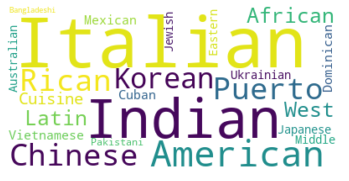

<Figure size 2160x3240 with 0 Axes>

In [158]:
#visualize
plt.imshow(mh_obj, interpolation='bilinear')
plt.axis('off')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

#### Using word cloud analyze the preferred data in Brooklyn

In [159]:
br_data = df_cuisine[df_cuisine['Borough'] == 'Brooklyn'].reset_index(drop=True)
br_cuisine = br_data[['Cuisine']]
br_cuisine

Cuisine
0    Irish, Italian, Greek, Turkish, Lebanese, Pal...
1    African-American, Jamaican, Trinidadian, Puer...
2    Italian, Chinese, Turkish, Russian, Mexican, ...
3                   Jewish, Italian, Mexican, Chinese
4    Russian, Georgian, Turkish, Pakistani and Ukr...
5    Puerto Rican, Mexican, Dominican, and Ecuadorian
6             Jamaican, West Indian, African-American
7                                             Italian
8                   Jamaican, West Indian, and Jewish
9       African-American, Dominican, and Puerto Rican
10                      Jamaican, Haitian, and Creole
11                               Polish and Ukrainian
12     Bengali, Pakistani, Mexican, Uzbek, and Polish
13            Jewish, Italian, Russian, and Pakistani
14   Italian, Irish, French, and Puerto Rican (for...
15        Puerto Rican, African-American, and Italian
16             Seafood, Chinese, Russian, and Italian
17   Puerto Rican, Chinese, Arab, Mexican and Italian
18        Italian, Jewish, Dominican and Puerto Rican

In [160]:
br_cuisine.to_csv('br_cuisine.txt', sep = ',', index=False)
br_wc = open('br_cuisine.txt', 'r').read()
stopwords = set(STOPWORDS)
br_cuisine_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stopwords)

br_cuisine_wc.generate(br_wc)

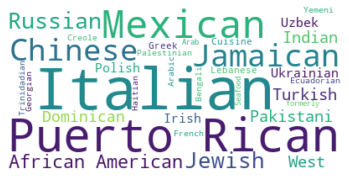

<Figure size 2160x3240 with 0 Axes>

In [161]:
# display the word cloud
plt.imshow(br_cuisine_wc, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)

plt.show()

Most preffered food in both boroughs is Italian. 

#### Further analyze Manhattan and Brooklyn neighborhoods

In [162]:
MB_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude          Venue  \
0  Marble Hill              40.876551               -73.91066    Bikram Yoga   
1  Marble Hill              40.876551               -73.91066       Arturo's   
2  Marble Hill              40.876551               -73.91066  Tibbett Diner   
3  Marble Hill              40.876551               -73.91066    Sam's Pizza   
4  Marble Hill              40.876551               -73.91066      Starbucks   

   Venue Latitude  Venue Longitude Venue Category  
0       40.876844       -73.906204    Yoga Studio  
1       40.874412       -73.910271    Pizza Place  
2       40.880404       -73.908937          Diner  
3       40.879435       -73.905859    Pizza Place  
4       40.877531       -73.905582    Coffee Shop

In [163]:
MB_venues.shape

(9705, 7)

In [164]:

colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
MB_venues = MB_venues[colnames]
MB_venues.columns = MB_venues.columns.str.replace(' ', '')
MB_venues.head()

Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude          Venue  \
0  Marble Hill             40.876551              -73.91066    Bikram Yoga   
1  Marble Hill             40.876551              -73.91066       Arturo's   
2  Marble Hill             40.876551              -73.91066  Tibbett Diner   
3  Marble Hill             40.876551              -73.91066    Sam's Pizza   
4  Marble Hill             40.876551              -73.91066      Starbucks   

   VenueLatitude  VenueLongitude VenueCategory  
0      40.876844      -73.906204   Yoga Studio  
1      40.874412      -73.910271   Pizza Place  
2      40.880404      -73.908937         Diner  
3      40.879435      -73.905859   Pizza Place  
4      40.877531      -73.905582   Coffee Shop

In [0]:
# Get only the restaurants
MB_venues_rest = MB_venues[MB_venues['VenueCategory'].str.contains('Restaurant')]

In [166]:
MB_venues_rest.shape

(2433, 7)

In [167]:
MB_venues_rest.head()

Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude  \
6   Marble Hill             40.876551              -73.91066   
7   Marble Hill             40.876551              -73.91066   
12  Marble Hill             40.876551              -73.91066   
15  Marble Hill             40.876551              -73.91066   
17  Marble Hill             40.876551              -73.91066   

                                 Venue  VenueLatitude  VenueLongitude  \
6                           El Malecon      40.879338      -73.904457   
7                 Estrellita Poblana V      40.879687      -73.906257   
12  Picante Picante Mexican Restaurant      40.878252      -73.902936   
15               Land & Sea Restaurant      40.877885      -73.905873   
17             El Economico Restaurant      40.879330      -73.904597   

           VenueCategory  
6   Caribbean Restaurant  
7     Mexican Restaurant  
12    Mexican Restaurant  
15    Seafood Restaurant  
17    Spanish Restaurant

In [0]:
MB_coord = MB_venues_rest[['VenueLatitude', 'VenueLongitude']]

In [169]:
MB_coord.head()

VenueLatitude  VenueLongitude
6       40.879338      -73.904457
7       40.879687      -73.906257
12      40.878252      -73.902936
15      40.877885      -73.905873
17      40.879330      -73.904597

In [170]:
MB_coord.shape

(2433, 2)

In [171]:
# Use kmeans to cluster all the restaurants
from sklearn.cluster import KMeans
k_means = KMeans(init = 'k-means++', n_clusters =2, n_init=10)
k_means.fit(MB_coord)
k_means.cluster_centers_

array([[ 40.64612216, -73.96088357],
       [ 40.75697433, -73.97316284]])

In [0]:
labels = k_means.labels_

In [173]:

MB_venues_rest['clus_l'] = labels
MB_venues_rest.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude  \
6   Marble Hill             40.876551              -73.91066   
7   Marble Hill             40.876551              -73.91066   
12  Marble Hill             40.876551              -73.91066   
15  Marble Hill             40.876551              -73.91066   
17  Marble Hill             40.876551              -73.91066   

                                 Venue  VenueLatitude  VenueLongitude  \
6                           El Malecon      40.879338      -73.904457   
7                 Estrellita Poblana V      40.879687      -73.906257   
12  Picante Picante Mexican Restaurant      40.878252      -73.902936   
15               Land & Sea Restaurant      40.877885      -73.905873   
17             El Economico Restaurant      40.879330      -73.904597   

           VenueCategory  clus_l  
6   Caribbean Restaurant       1  
7     Mexican Restaurant       1  
12    Mexican Restaurant       1  
15    Seafood Restaurant       1  
17    Spanish Restaurant       1

In [174]:
MB_venues_rest.shape

(2433, 8)

In [175]:
# create map of Manhattan and Brooklyn boroughs with the clustered restaurants
map_res = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(MB_venues_rest['VenueLatitude'], MB_venues_rest['VenueLongitude'], MB_venues_rest['Neighborhood'], MB_venues_rest['clus_l']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_res)
       
map_res

### Obviously we cannot show so many points on a folium map for whatever reason. Lets try to pick the  places with Italian restaurants.

In [176]:
# Creating a dataframe with Italian restaurants only.
MB_rest_ita = MB_venues_rest[MB_venues_rest['VenueCategory'].str.contains('Italian')]
MB_rest_ita.head()

Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude  \
96     Bay Ridge             40.625801             -74.030621   
109    Bay Ridge             40.625801             -74.030621   
132    Bay Ridge             40.625801             -74.030621   
139    Bay Ridge             40.625801             -74.030621   
154    Bay Ridge             40.625801             -74.030621   

                         Venue  VenueLatitude  VenueLongitude  \
96               Tuscany Grill      40.622913      -74.031387   
109            Areo Ristorante      40.624415      -74.030782   
132   Ponte Vecchio Restaurant      40.621227      -74.029143   
139          Gino's Restaurant      40.629859      -74.022543   
154  Sofia Restorante Italiano      40.624847      -74.030522   

          VenueCategory  clus_l  
96   Italian Restaurant       0  
109  Italian Restaurant       0  
132  Italian Restaurant       0  
139  Italian Restaurant       0  
154  Italian Restaurant       0

In [177]:
MB_rest_ita.shape

(242, 8)

In [178]:
MB_rest_ita['clus_l'].value_counts().to_frame()

clus_l
1     140
0     102

In [179]:
# Build a map of Italian restaurants on top
map_res_ita = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(MB_rest_ita['VenueLatitude'], MB_rest_ita['VenueLongitude'], MB_rest_ita['Neighborhood'], MB_rest_ita['clus_l']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_res_ita)
       
map_res_ita

### The algorithm has done a good job clustering the restaurants in two clusters. It is obvious that Brooklyn has lower number of Italian restaurants and it is better to start a business there.

In [180]:
MB_rest_ita['clus_l'].value_counts().to_frame()

clus_l
1     140
0     102

#### Lets visualize the exact number of points in a cluster.

In [181]:

from folium import plugins
Rest_map2 = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
restaurants = plugins.MarkerCluster().add_to(Rest_map2)
#Colors
x = np.arange(2)
ys = [i+x+(i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



# loop through the dataframe and add each data point to the mark cluster
for lat, lon, neigh, cluster in zip(MB_rest_ita['VenueLatitude'], MB_rest_ita['VenueLongitude'], MB_rest_ita['Neighborhood'], MB_rest_ita['clus_l']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(restaurants)
    
Rest_map2

### Trying KMeans with different number of clusters

In [182]:
k_means2 = KMeans(init = 'k-means++', n_clusters =3, n_init=10)
k_means2.fit(MB_coord)
k_means2.cluster_centers_

array([[ 40.63512867, -73.95671171],
       [ 40.72087715, -73.9833423 ],
       [ 40.80371198, -73.9517273 ]])

In [183]:
k_means2.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [0]:
labels2 = k_means2.labels_

In [185]:

MB_venues_rest['clus_l2'] = labels2
MB_venues_rest.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude  \
6   Marble Hill             40.876551              -73.91066   
7   Marble Hill             40.876551              -73.91066   
12  Marble Hill             40.876551              -73.91066   
15  Marble Hill             40.876551              -73.91066   
17  Marble Hill             40.876551              -73.91066   

                                 Venue  VenueLatitude  VenueLongitude  \
6                           El Malecon      40.879338      -73.904457   
7                 Estrellita Poblana V      40.879687      -73.906257   
12  Picante Picante Mexican Restaurant      40.878252      -73.902936   
15               Land & Sea Restaurant      40.877885      -73.905873   
17             El Economico Restaurant      40.879330      -73.904597   

           VenueCategory  clus_l  clus_l2  
6   Caribbean Restaurant       1        2  
7     Mexican Restaurant       1        2  
12    Mexican Restaurant       1        2  
15    Seafood Restaurant       1        2  
17    Spanish Restaurant       1        2

In [186]:
MB_rest_ita2 = MB_venues_rest[MB_venues_rest['VenueCategory'].str.contains('Italian')]
MB_rest_ita2.head()

Neighborhood  NeighborhoodLatitude  NeighborhoodLongitude  \
96     Bay Ridge             40.625801             -74.030621   
109    Bay Ridge             40.625801             -74.030621   
132    Bay Ridge             40.625801             -74.030621   
139    Bay Ridge             40.625801             -74.030621   
154    Bay Ridge             40.625801             -74.030621   

                         Venue  VenueLatitude  VenueLongitude  \
96               Tuscany Grill      40.622913      -74.031387   
109            Areo Ristorante      40.624415      -74.030782   
132   Ponte Vecchio Restaurant      40.621227      -74.029143   
139          Gino's Restaurant      40.629859      -74.022543   
154  Sofia Restorante Italiano      40.624847      -74.030522   

          VenueCategory  clus_l  clus_l2  
96   Italian Restaurant       0        0  
109  Italian Restaurant       0        0  
132  Italian Restaurant       0        0  
139  Italian Restaurant       0        0  
154  Italian Restaurant       0        0

In [187]:
MB_rest_ita2['clus_l2'].value_counts().to_frame()

clus_l2
1      122
0       65
2       55

In [188]:
# Build a map of Italian restaurants on top
map_res_ita2 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i+x+(i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neigh, cluster in zip(MB_rest_ita2['VenueLatitude'], MB_rest_ita2['VenueLongitude'], MB_rest_ita2['Neighborhood'], MB_rest_ita2['clus_l2']):
    label = folium.Popup(str(neigh) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_res_ita2)
       
map_res_ita2

### In this case the algorithm shows a third area in Manhattan that has lower number of restaurants but they are more densely populated. That is why I consider Brooklyn as a better location.

## Results and Discussion <a name="results"></a>

The analysis shows that the market is fairly saturated. There is not much room for opening new restaurant unless it has something
special to it. Offering Italian food restaurant might have success, in  Brooklyn where there are lower number of Italian restaurants nad as seen on the map, larger gaps between them.

## Conclusion <a name="conclusion"></a>

Starting a new business by opening a new Italian restaurant either in Mahattan or Brooklyn is a big risk, considering those boroughs are highly saturated with restaurants, although most people prefer Italian food. If a decision is made to open a restaurant in those areas it should be in neighborhoods that belong to cluster1 from the map with two clusters.